# <center> SHAKEPAY ASSIGNMENT </center>

https://shakepay.github.io/programming-exercise/web/

---
## GOAL

### Build a UI that displays the change of your net worth over time

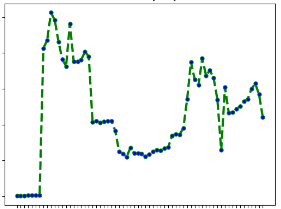

---

## RESOURCES


### API: Conversion rates for BTC/CAD  (01/01/2018 - 04/22/2020)


https://shakepay.github.io/programming-exercise/web/rates_CAD_BTC.json
```
    {
        "pair": "CAD_BTC",
        "midMarketRate": 17678.38333333333,
        "createdAt": "2018-01-01T00:00:00.000Z"
    },
```


### API: Conversion rates for ETH/CAD  (07/13/2018 - 04/22/2020)



https://shakepay.github.io/programming-exercise/web/rates_CAD_ETH.json
```
    {
        "pair": "CAD_ETH",
        "midMarketRate": 576.0677778268919,
        "createdAt": "2018-07-13T03:41:00.000Z"
    },
```

---

### API: Your transactions history containing credits, debits, and conversions   (01/17/2018 - 04/20/2020)
https://shakepay.github.io/programming-exercise/web/transaction_history.json 


```
        {
            "createdAt": "2018-01-17T18:23:26.696Z",
            "amount": 5.21,
            "currency": "CAD",
            "direction": "credit",  ---> CREDIT / DEBIT / NONE=conversion
        },

        {
            "createdAt": "2020-02-07T03:07:52.330Z",
            "amount": 5,
            "currency": "CAD",
            "direction": null,
            "to": {
                "currency": "BTC",
                "amount": 0.00038096
            }
        },
```

---
### Formula: How to calculate your net worth (for any given day)
- `net_worth` = `CAD_balance` + `BTC * rate` + `ETH * rate`



-------

# <center> SOLUTION </center>
-----

In [1]:
import requests as requests
import matplotlib.pyplot as plt

### (1) Rates

Create a dictionary with currency, rate, dates
```
{
    'BTC': {'2018-01-01': 17678.38333333333, date2: rate2, ...},
    'ETH: {'2018-01-17': 576.0677778268919, date2: rate2, ...}
}


In [2]:
btc_rates = requests.get("https://shakepay.github.io/programming-exercise/web/rates_CAD_BTC.json").json()

In [3]:
eth_rates = requests.get("https://shakepay.github.io/programming-exercise/web/rates_CAD_ETH.json").json()

In [4]:
rates = {
    'ETH': {rate['createdAt'][:10]: rate['midMarketRate'] for rate in eth_rates},
    'BTC': {rate['createdAt'][:10]: rate['midMarketRate'] for rate in btc_rates},
}

Create lookup function for a transaction date's rate

In [5]:
btc_dates = list(rates['BTC'].keys())
eth_dates = list(rates['ETH'].keys())

In [6]:
def get_rate(currency, date):

    try:
        return rates[currency][date]

    
    # if rate doesn't exist for a transaction's date, then return the next rate
    except KeyError:

        if currency == 'BTC':
            lst = list(rates['BTC'].keys())
            lst.append(date)
            tmr_index = sorted(lst).index(date) + 1
            date =  btc_dates[tmr_index]
            return rates['BTC'][date]
        
        if currency == 'ETH':
            lst = list(rates['ETH'].keys())
            lst.append(date)
            srted_lst = sorted(lst)
            tmr_index = srted_lst.index(date) + 1
            date = eth_dates[tmr_index]
            return rates['ETH'][date]



### (2) Transactions



Iterate through transaction history dictionaries
- update the balance in a global `balance` dictionary
- calculate daily net worth and store it in a global `net_worth_by_day` dictionary


In [7]:
data = requests.get("https://shakepay.github.io/programming-exercise/web/transaction_history.json").json()

In [8]:
transactions = sorted(data, key=lambda d: d['createdAt'])

In [9]:
balance = {
    "CAD": 0,
    "BTC": 0,
    "ETH": 0
}

In [10]:
net_worth_by_day = {}

In [11]:
def calculate_net_worth(transactions):

    for txn in transactions:
        
        # create variables, make more readable for dict calculations
        currency = txn['currency'] 
        amount = txn['amount']
        date = txn['createdAt'][:10]

        
        # subtract debits, add credits 
        if txn['direction'] == 'debit':
            balance[currency] -= amount

        if txn['direction'] == 'credit':
            balance[currency] += amount

        # handle conversions
        if txn['direction'] is None:

            # subtract before-conversion amounts
            balance[currency] -= amount

            # add after-conversion amounts
            to_currency = txn['to']['currency']
            to_amount = txn['to']['amount']
            balance[to_currency] += to_amount

        # update global balance
        txn['balance'] = balance

        # calculate net balance with relevant rates
        net = (
                balance['CAD'] +
                (balance['BTC'] * get_rate('BTC', date)) + 
                (balance['ETH'] * get_rate('ETH', date))
        )/1000000 
        
        # make it compatible with chart
        net_worth = float(format(net, ".3f"))

        # add only 1 entry per transaction
        net_worth_by_day.update({date: net_worth}) 

    return net_worth_by_day
    

### Final balance & Net Worth By Day

In [12]:
balance

{'CAD': 0, 'BTC': 0, 'ETH': 0}

In [13]:
calculate_net_worth(transactions)

{'2018-01-17': 0.018,
 '2018-01-25': 0.017,
 '2018-01-26': 0.017,
 '2018-01-27': 0.017,
 '2018-02-14': 0.017,
 '2018-02-15': 0.039,
 '2018-02-19': 0.043,
 '2018-02-21': 0.043,
 '2018-02-22': 0.064,
 '2018-02-23': 0.065,
 '2018-02-25': 0.064,
 '2018-02-26': 0.064,
 '2018-02-28': 0.069,
 '2018-03-01': 0.066,
 '2018-03-02': 0.067,
 '2018-03-05': 0.071,
 '2018-03-06': 0.074,
 '2018-03-16': 0.056,
 '2018-03-20': 0.057,
 '2018-03-23': 0.058,
 '2018-03-29': 9.237,
 '2018-03-30': 8.26,
 '2018-04-10': 7.418,
 '2018-04-12': 7.53,
 '2018-04-18': 8.72,
 '2018-04-19': 8.977,
 '2018-04-25': 9.389,
 '2018-05-02': 10.253,
 '2018-05-05': 10.651,
 '2018-05-08': 10.288,
 '2018-05-14': 9.839,
 '2018-05-24': 8.491,
 '2018-05-30': 8.411,
 '2018-06-08': 8.628,
 '2018-06-15': 7.724,
 '2018-06-18': 7.529,
 '2018-07-03': 7.638,
 '2018-07-05': 7.541,
 '2018-07-10': 7.607,
 '2018-07-11': 7.263,
 '2018-07-12': 7.246,
 '2018-07-23': 8.423,
 '2018-07-25': 9.637,
 '2018-07-27': 9.458,
 '2018-07-30': 9.467,
 '2018-08-

### (3) Chart

- server: https://github.com/taniabatista/crypto-prices/blob/main/server.py


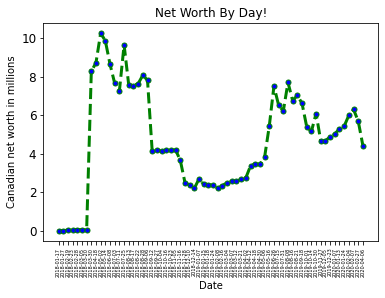

In [14]:
x = list(net_worth_by_day.keys())[::3] # take every 3, more readable
y = list(net_worth_by_day.values())[::3]

plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Date')
plt.ylabel('Canadian net worth in millions') # need to break down more

plt.xticks(ticks=range(len(x)), rotation=90, size=5)
plt.yticks(size=12)

plt.title('Net Worth By Day!')

plt.show()